# Bài tập thực hành môn Phân tích và xử lý ảnh 05
# MSSV: 18110014, Họ tên: Nguyễn Phú Thành

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pywt

In [2]:
def imShows(Images, Labels = None, rows = 1, cols = 1):
    imagesArray = list(Images)
    labelsArray = [f"Image {i + 1}" for i in range(len(imagesArray))] if Labels is None else list(Labels)
    figsize = (20, 20) if ((rows == 1) and (cols == 1)) else (cols * 8, rows * 5)
    fig = plt.figure(figsize = figsize)
    for i in range(1, rows * cols + 1):
        ax = fig.add_subplot(rows, cols, i)
        image = imagesArray[i - 1]
        cmap = plt.cm.gray if (len(image.shape) < 3) else None
        ax.imshow(image, cmap = cmap)
        ax.set(title = labelsArray[i - 1], xticks = [], yticks = [])
    plt.show()
def showThreeImages(IM1, IM2, IM3):
    imShows([IM1, IM2, IM3], rows = 1, cols = 3)
def showTwoImages(IM1, IM2):
    imShows([IM1, IM2], rows = 1, cols = 2)
def showOneImage(IM1):
    imShows([IM1])
def showListImages(listImage, listLabels = None, rows = 1, cols = 1):
    imShows(listImage, Labels = listLabels, rows = rows, cols = cols)

# 1. Kiếm một ảnh trên internet và thực hiện tất cả các biến đổi wavelet 'db5', 'sym5', 'coif5', 'bior1.3', 'haar' ở mức 1 và 2 (two level decomposition)

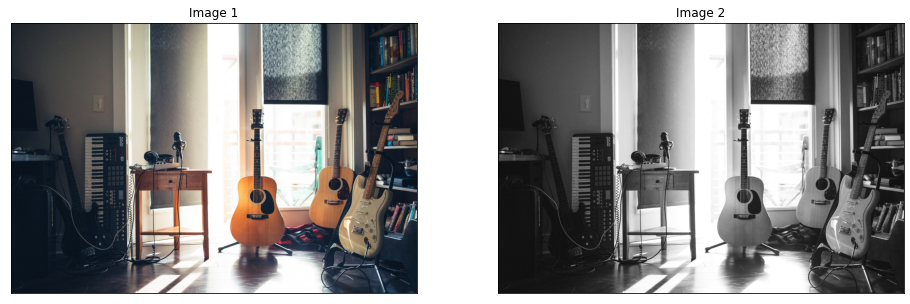

In [3]:
imageColor = plt.imread('guitar.jpg')
imageGray = cv2.cvtColor(imageColor, cv2.COLOR_RGB2GRAY)
showTwoImages(imageColor, imageGray)

In [4]:
imageGray_float = imageGray.astype(np.float32)
shape = imageGray_float.shape

In [5]:
max_lev = 2
label_levels = 2
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior1.3', 'haar']

Using db5 function in wavelet transform


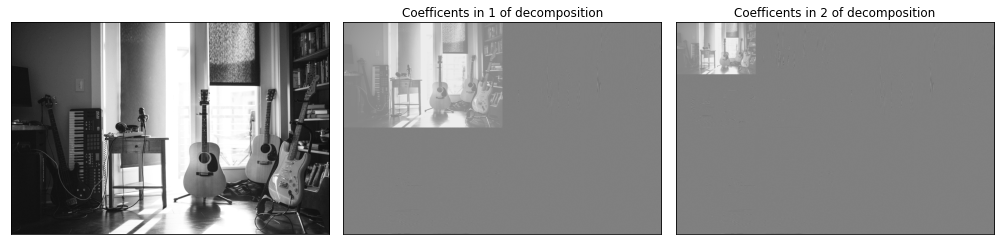

Using sym5 function in wavelet transform


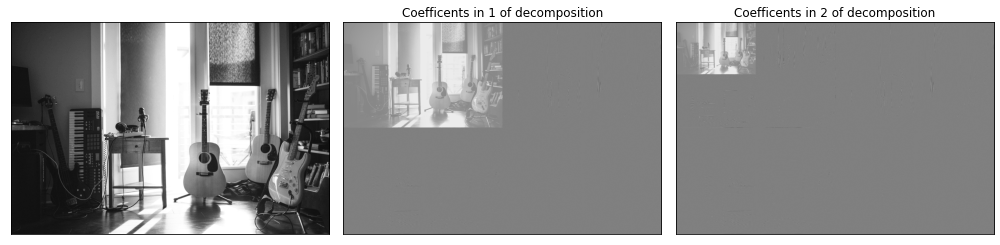

Using coif5 function in wavelet transform


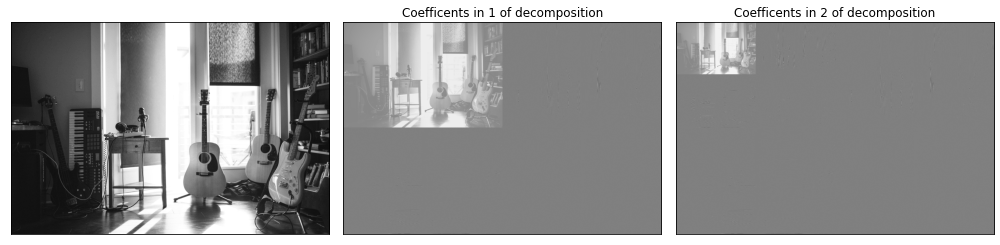

Using bior1.3 function in wavelet transform


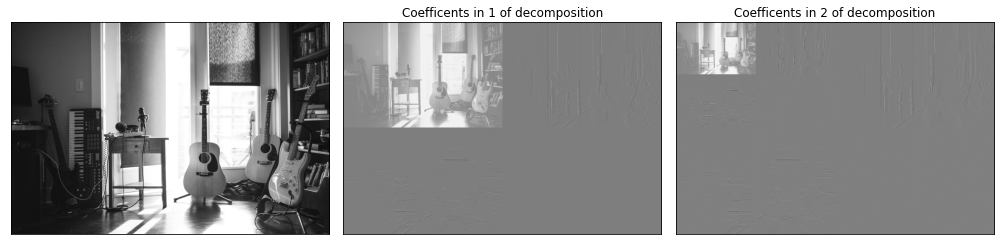

Using haar function in wavelet transform


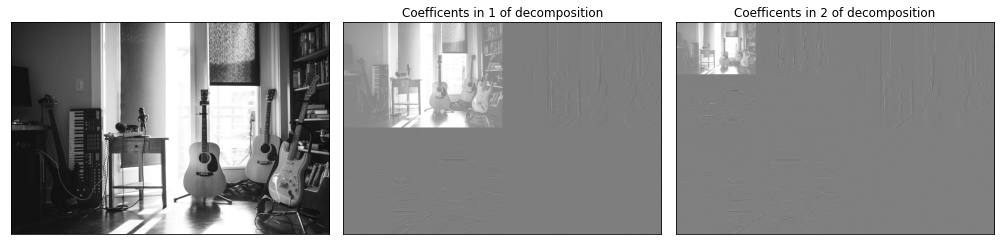

In [6]:
for wavelet in discrete_wavelets:
    print(f'Using {wavelet} function in wavelet transform')
    fig, axes = plt.subplots(1, max_lev + 1, figsize=[14, 8])

    for ax in axes.ravel():
        ax.set(xticks = [], yticks = [])

    for level in range(0, max_lev + 1):
        if level == 0:
            axes[0].imshow(imageGray_float, cmap = plt.cm.gray)
            continue
        coeffs = pywt.wavedec2(imageGray_float, wavelet , mode = 'periodization', level = level)
        coeffs[0] /= np.abs(coeffs[0]).max()
        for detail_level in range(level):
            coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

        arr, slices = pywt.coeffs_to_array(coeffs)
        
        axes[level].imshow(arr, cmap = plt.cm.gray)
        axes[level].set(title = f'Coefficents in {level} of decomposition')

    plt.tight_layout()
    plt.show()

# 2. Viết một hàm trong đó truyền các tham số là hình ảnh cẩn biền đổi, function wavelet dùng ('db5', 'sym5', 'coif5', 'bior1.3', 'haar') và level biến đổi. Giá trị trả về là ảnh xấp xỉ và các ảnh detail. Kiểm tra kết quả với một bức ảnh kiếm từ internet

In [7]:
def waveletTransform(img, waveletFunc = 'db5', level = 1, normalize = False):
    
    '''
        Perform wavelet transform on image
        -----------------------
        Parameters:
            img: numpy.ndarray
                2D input image to perform wavelet transform
            waveletFunc: str, default: 'db5'
                Wavelet function to apply
                Must be one of these strings: ('db5', 'sym5', 'coif5', 'bior1.3', 'haar')
            level: int, default: 1
                Level of decomposition
            normalize : bool, default: True
                If True, coefficents return from pywt.wavedec2 will be normalized
        -----------------------
        Returns:
            Returns arrays and slices which are results of using pywt.coeffs_to_array
    '''
    
    if waveletFunc not in ('db5', 'sym5', 'coif5', 'bior1.3', 'haar'):
        raise ValueError("Wavelet must be one of these functions: ('db5', 'sym5', 'coif5', 'bior1.3', 'haar')")
    
    img = img.astype(np.float32)
    coeffs = pywt.wavedec2(img, waveletFunc, mode = 'periodization', level = level)
    
    if normalize is True:
        coeffs[0] /= np.abs(coeffs[0]).max()
        for detail_level in range(level):
            coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]
    
    arr, slices = pywt.coeffs_to_array(coeffs)
    return arr, slices

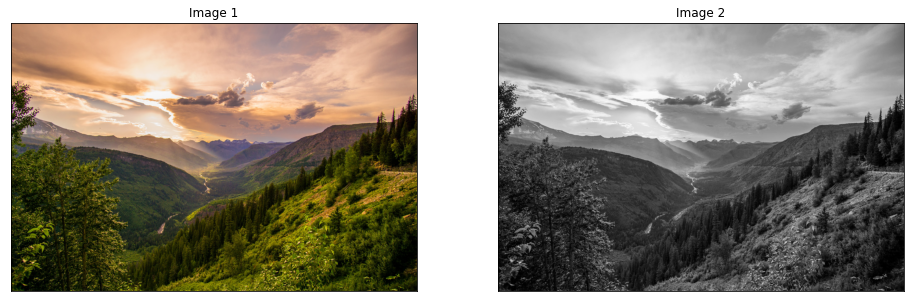

In [8]:
imageColor = plt.imread('jungle.jpg')
imageGray = cv2.cvtColor(imageColor, cv2.COLOR_RGB2GRAY)
showTwoImages(imageColor, imageGray)

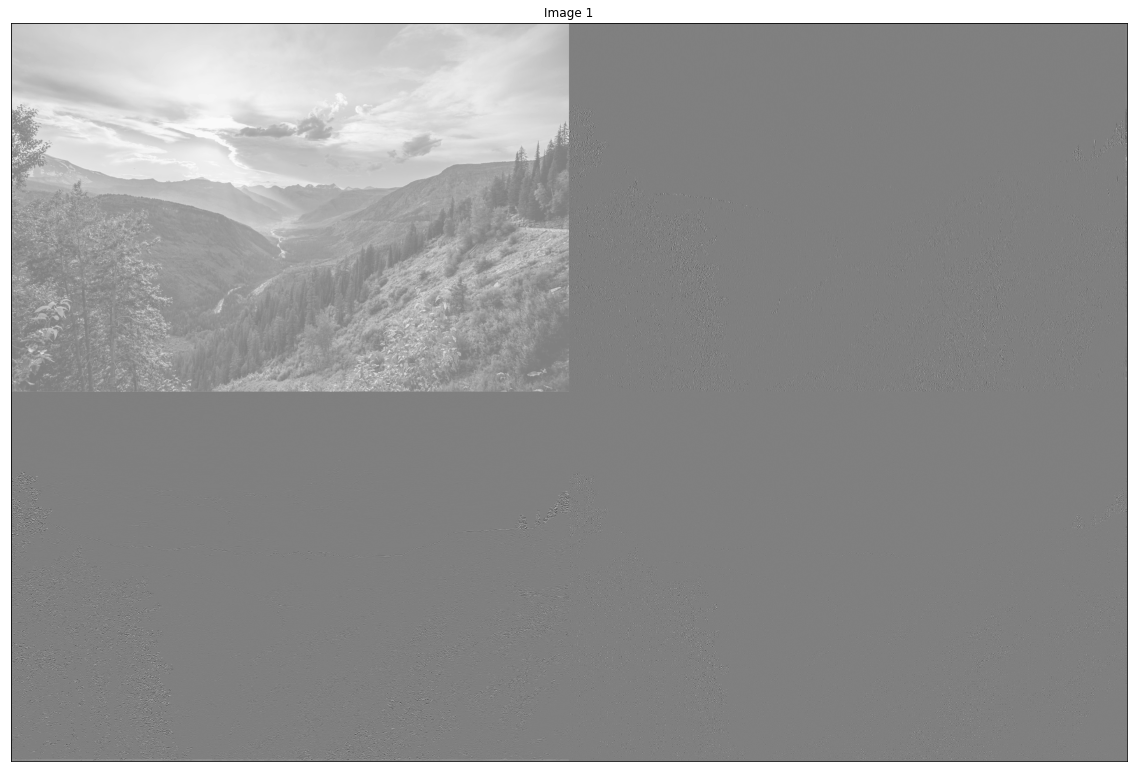

In [9]:
arr, slices = waveletTransform(imageGray, level = 1, normalize = True)
showOneImage(arr)

# 3. Kiếm một ảnh từ internet. Thực hiện biến đổi wavelet để phân rã thành ảnh xấp xỉ và ảnh detail. Sau đó tiến hành các bước sau 
    • Khôi phục ảnh gốc từ ảnh detail và ảnh approximation
    • Xóa thông tin ảnh horizontal detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lại
    • Xóa thông tin ảnh vertical detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lại
    • Xóa thông tin ảnh diagonal detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lại

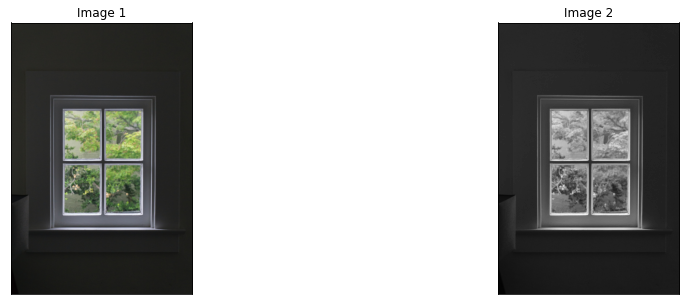

In [10]:
imageColor = plt.imread('window.jpg')
imageGray = cv2.cvtColor(imageColor, cv2.COLOR_RGB2GRAY)
imageHSV = cv2.cvtColor(imageColor, cv2.COLOR_RGB2HSV)
showTwoImages(imageColor, imageGray)

In [11]:
max_level, wavelet = 7, 'haar'

In [12]:
arr, slices = waveletTransform(
    imageGray, 
    waveletFunc = wavelet, 
    level = max_level
)

In [13]:
arr_HSV, slices_HSV = {}, {}
for index, channel in enumerate(['H', 'S', 'V']):
    arr_HSV[channel], slices_HSV[channel] = waveletTransform(
        imageHSV[:,:,index], 
        waveletFunc = wavelet, 
        level = max_level
    )

 # • Khôi phục ảnh gốc từ ảnh detail và ảnh approximation

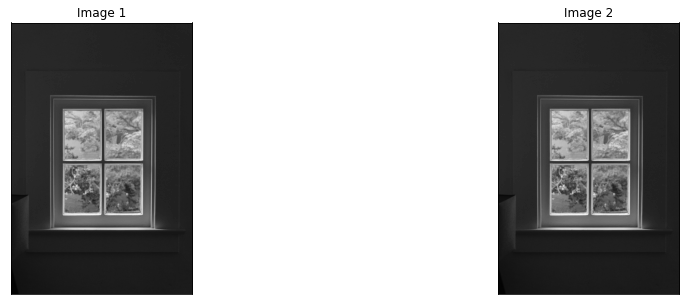

In [14]:
coeffs = pywt.array_to_coeffs(arr, slices, output_format = 'wavedec2')
reconstructImg = pywt.waverec2(coeffs, wavelet, mode = 'periodization')
showTwoImages(imageGray, reconstructImg)

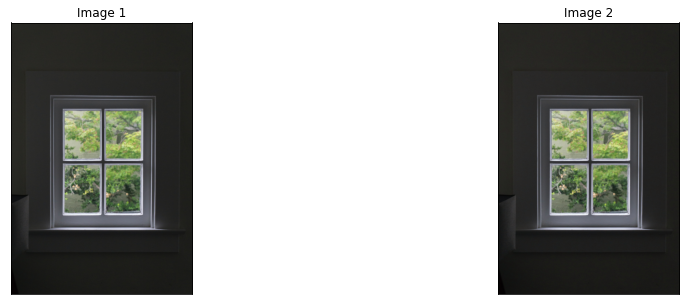

In [15]:
reconstructImg = np.zeros_like(imageHSV)

for index, channel in enumerate(['H', 'S', 'V']):
    coeffs = pywt.array_to_coeffs(arr_HSV[channel], slices_HSV[channel], output_format = 'wavedec2')
    reconstructImg[:,:,index] = pywt.waverec2(coeffs, wavelet, mode = 'periodization')

reconstructImg = cv2.cvtColor(reconstructImg, cv2.COLOR_HSV2RGB)
showTwoImages(imageColor, reconstructImg)

# • Xóa thông tin ảnh horizontal detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lại

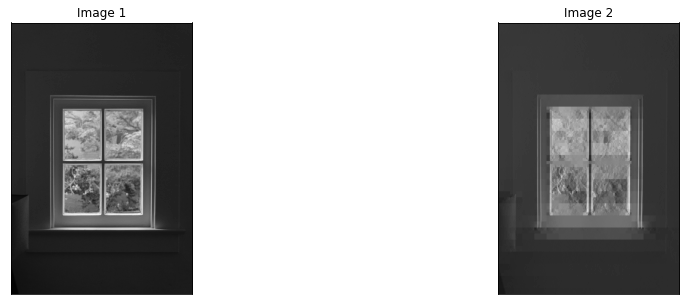

In [16]:
from copy import deepcopy

withoutHorizontal = deepcopy(arr)

for i in range(1, max_level + 1):
    withoutHorizontal[slices[i]['da']] = np.zeros_like(arr[slices[i]['da']])

coeffs = pywt.array_to_coeffs(withoutHorizontal, slices, output_format = 'wavedec2')

reconstructImg_Horizontal = pywt.waverec2(coeffs, wavelet, mode = 'periodization')
showTwoImages(imageGray, reconstructImg_Horizontal)

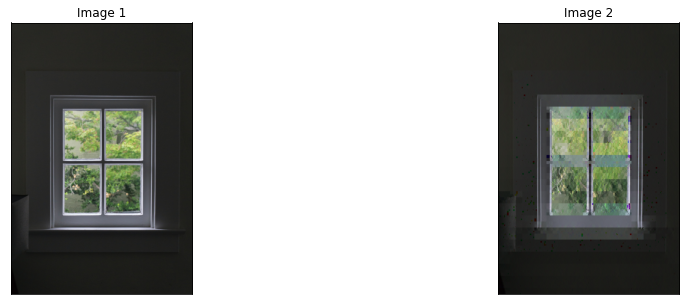

In [17]:
reconstructImg = np.zeros_like(imageHSV)

for index, channel in enumerate(['H', 'S', 'V']):
    withoutHorizontal = deepcopy(arr_HSV[channel])
    for i in range(1, max_level + 1):
        withoutHorizontal[slices_HSV[channel][i]['da']] = \
                                    np.zeros_like(arr_HSV[channel][slices_HSV[channel][i]['da']])
    coeffs = pywt.array_to_coeffs(withoutHorizontal, slices_HSV[channel], output_format = 'wavedec2')
    reconstructImg[:,:,index] = pywt.waverec2(coeffs, wavelet, mode = 'periodization')

reconstructImg = cv2.cvtColor(reconstructImg, cv2.COLOR_HSV2RGB)
showTwoImages(imageColor, reconstructImg)

# • Xóa thông tin ảnh vertical detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lại

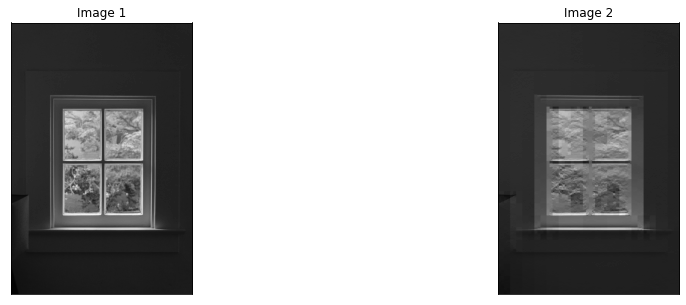

In [18]:
withoutVertical = deepcopy(arr)

for i in range(1, max_level + 1):
    withoutVertical[slices[i]['ad']] = np.zeros_like(arr[slices[i]['ad']])

coeffs = pywt.array_to_coeffs(withoutVertical, slices, output_format = 'wavedec2')
reconstructImg_Vertical = pywt.waverec2(coeffs, wavelet, mode = 'periodization')
showTwoImages(imageGray, reconstructImg_Vertical)

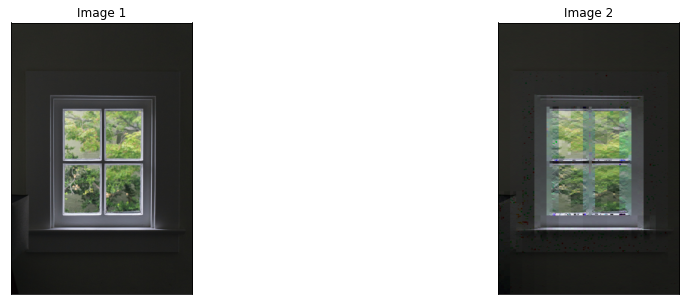

In [19]:
reconstructImg = np.zeros_like(imageHSV)

for index, channel in enumerate(['H', 'S', 'V']):
    withoutVertical = deepcopy(arr_HSV[channel])
    for i in range(1, max_level + 1):
        withoutVertical[slices_HSV[channel][i]['ad']] = \
                np.zeros_like(arr_HSV[channel][slices_HSV[channel][i]['ad']])
    coeffs = pywt.array_to_coeffs(withoutVertical, slices_HSV[channel], output_format = 'wavedec2')
    reconstructImg[:,:,index] = pywt.waverec2(coeffs, wavelet, mode = 'periodization')

reconstructImg = cv2.cvtColor(reconstructImg, cv2.COLOR_HSV2RGB)
showTwoImages(imageColor, reconstructImg)

# • Xóa thông tin ảnh diagonal detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lại

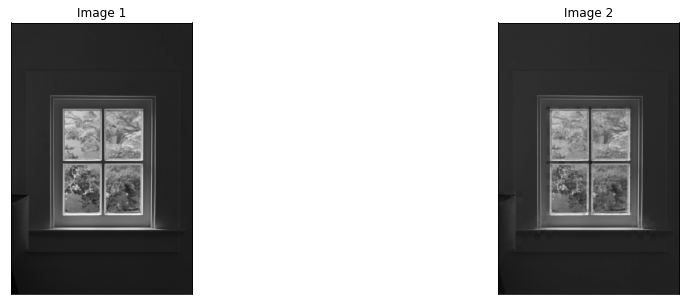

In [20]:
withoutDiagonal = deepcopy(arr)

for i in range(1, max_level + 1):
    withoutDiagonal[slices[i]['dd']] = np.zeros_like(arr[slices[i]['dd']])

coeffs = pywt.array_to_coeffs(withoutDiagonal, slices, output_format = 'wavedec2')
reconstructImg_Diag = pywt.waverec2(coeffs, wavelet, mode = 'periodization')
showTwoImages(imageGray, reconstructImg_Diag)

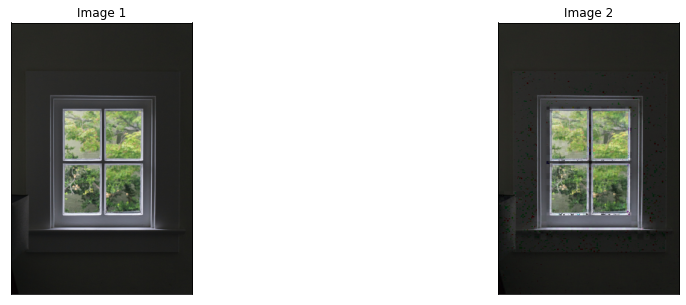

In [21]:
reconstructImg = np.zeros_like(imageHSV)

for index, channel in enumerate(['H', 'S', 'V']):
    withoutDiagonal = deepcopy(arr_HSV[channel])
    for i in range(1, max_level + 1):
        withoutDiagonal[slices_HSV[channel][i]['dd']] = \
                                np.zeros_like(arr_HSV[channel][slices_HSV[channel][i]['dd']])
    coeffs = pywt.array_to_coeffs(withoutDiagonal, slices_HSV[channel], output_format = 'wavedec2')
    reconstructImg[:,:,index] = pywt.waverec2(coeffs, wavelet, mode = 'periodization')

reconstructImg = cv2.cvtColor(reconstructImg, cv2.COLOR_HSV2RGB)
showTwoImages(imageColor, reconstructImg)